# NUKALA NAGA PAVAN
# A.NITHIN
# T.G.KIRAN

## Random Forest Model on DEV_SAMPLE and HOLDOUT_SAMPLE

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

## Importing the Data and EDA

In [218]:
train = pd.read_csv( "DEV_SAMPLE.csv" )
test = pd.read_csv( "HOLDOUT_SAMPLE.csv")

In [219]:
train.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31


In [220]:
test.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C12935,0,26,M,67291.63,SENP,6,26-30,559,31
1,C8669,0,31,M,151255.63,PROF,8,31-35,652,24
2,C16922,0,26,M,67814.45,SAL,35,26-30,531,9
3,C12468,0,23,M,370783.97,SAL,5,<25,434,11
4,C14486,0,40,F,284187.58,SENP,3,36-40,679,8


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 10 columns):
Cust_ID           14000 non-null object
Target            14000 non-null int64
Age               14000 non-null int64
Gender            14000 non-null object
Balance           14000 non-null float64
Occupation        14000 non-null object
No_OF_CR_TXNS     14000 non-null int64
AGE_BKT           14000 non-null object
SCR               14000 non-null int64
Holding_Period    14000 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [222]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
Cust_ID           6000 non-null object
Target            6000 non-null int64
Age               6000 non-null int64
Gender            6000 non-null object
Balance           6000 non-null float64
Occupation        6000 non-null object
No_OF_CR_TXNS     6000 non-null int64
AGE_BKT           6000 non-null object
SCR               6000 non-null int64
Holding_Period    6000 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 468.8+ KB


In [223]:
train.corr()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
Target,1.000000,0.024236,-0.072437,0.131704,0.076211,-0.206368
Age,0.024236,1.000000,-0.146460,0.055351,-0.003700,-0.011275
Balance,-0.072437,-0.146460,1.000000,-0.136202,-0.015838,0.018325
No_OF_CR_TXNS,0.131704,0.055351,-0.136202,1.000000,0.000952,-0.036184
SCR,0.076211,-0.003700,-0.015838,0.000952,1.000000,-0.031376
Holding_Period,-0.206368,-0.011275,0.018325,-0.036184,-0.031376,1.000000


In [224]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
## all_data.drop(['Target'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (20000, 10)


## Dividing into Categorical and Numerical coulmns

In [225]:
all_cols = all_data.columns

In [226]:
num_cols = all_data._get_numeric_data().columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['Target', 'Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period'], dtype='object')


In [227]:
cat_cols = list( set(all_cols) -  set(num_cols) )
print("Categorical columns: ",cat_cols)

Categorical columns:  ['Gender', 'Occupation', 'AGE_BKT', 'Cust_ID']


## Encode categorical values as numbers

In [228]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

In [229]:
le = LabelEncoder()
for i in cat_cols:
    all_data[i] = le.fit_transform(all_data[i])

In [230]:
X = all_data[["Age","Gender","Balance","Occupation","No_OF_CR_TXNS","AGE_BKT","Holding_Period"]]

In [231]:
y = all_data[["Target"]]

In [232]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

C:\Users\nagapavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [236]:
print(clf.feature_importances_)

[ 0.06077595  0.03344012  0.14551275  0.1200684   0.23926832  0.01511925
  0.38581519]


In [237]:
pred_y_train = clf.predict(X_train)
pred_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [238]:
score = accuracy_score(y_train, pred_y_train)
score

0.91221428571428576

## Accuracy is 91.22 % for this model developed on train data

In [243]:
pred_y_test = clf.predict(X_test)
pred_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [244]:
score = accuracy_score(y_test, pred_y_test)
score

0.91800000000000004

##  Accuracy is 91.08% for this Test data.

In [239]:
X_train = pd.DataFrame(X_train)

In [240]:
z = list (X_train.columns.values)
z

['Age',
 'Gender',
 'Balance',
 'Occupation',
 'No_OF_CR_TXNS',
 'AGE_BKT',
 'Holding_Period']

In [241]:
feature_imp = pd.Series(clf.feature_importances_,index=z).sort_values(ascending=False)
feature_imp

Holding_Period    0.385815
No_OF_CR_TXNS     0.239268
Balance           0.145513
Occupation        0.120068
Age               0.060776
Gender            0.033440
AGE_BKT           0.015119
dtype: float64

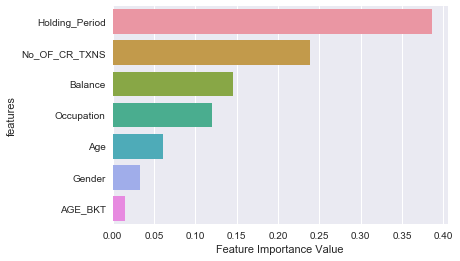

In [242]:
sns.barplot(x= feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Value')
plt.ylabel('features')
plt.legend()
plt.show()

## Let's Drop the "Gender" , "AGE_BKT"  and run the model again

In [245]:
X = all_data[["Age","Balance","Occupation","No_OF_CR_TXNS","Holding_Period"]]

In [246]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)

In [247]:

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

C:\Users\nagapavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [248]:
pred_y_train = clf.predict(X_train)
pred_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [249]:
score = accuracy_score(y_train, pred_y_train)
score

0.91528571428571426

## TheTest model accuracy increased from 91.22% to 91.52%

In [252]:
pred_y_test1 = clf.predict(X_test)
pred_y_test1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [254]:
score = accuracy_score(y_test, pred_y_test1)
score

0.91016666666666668